In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CDFT cuts

In [28]:
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]

In [29]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0028130864317399418 136.41274238634784 94
[ 0.52080495  0.01352913  0.13019588  0.73290365  0.26274421 -2.48372299] -0.25386051143771154 0.2809187779604154 0.0028130864317399418
0.8214817824214234 81.31673899461771 94
[ 0.51898777  0.0129644   0.12337844  1.0273045   0.36366213 -4.30811906] -0.24042394555229132 0.26635274808974385 0.8214817824214234
0.8601097971353662 79.34404080251322 94
[ 0.58759827  0.01304389  0.12672435  0.92673086  0.33151353 -2.98847733] -0.24721610598378446 0.27330389323657556 0.8601097971353662
0.6247853983045498 89.05818718350046 94
0.6611880421495658 87.77244800897002 94
0.8463966060184471 80.07741172596764 94
0.708051649774526 86.05409918628428 94
0.6588228677492188 87.85706749218106 94
0.33633431501212685 99.22259383879688 94
0.8932954002284019 77.36005955668938 94
[ 0.57106194  0.01282348  0.12607774  0.94320535  0.34978697 -3.25033073] -0.24610853492772197 0.2717555022658629 0.8932954002284019


In [31]:
len(dvcsSimInbCDFT)

885499

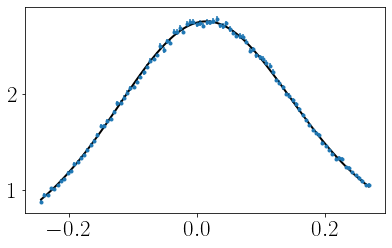

In [32]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [33]:
print(lb_opt, ub_opt)

-0.3654097325576401 0.39105669989578107


In [34]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_ep<0.391)&(dvcsSimInbCDFT.MM2_ep>-0.365)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_ep<0.391)&(bkgSimInbCDFT.MM2_ep>-0.365)]

In [35]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 283608.965911 94
0.0005788720712218698 144.99499205038055 94
[ 0.56085741  0.9024569   0.18707819 -1.12971725  3.30046367 -1.55089839] 0.5182452687743918 1.2866685256838297 0.0005788720712218698
0.018936710834920878 124.62618637847426 94
[ 0.64859691  0.90006702  0.1906777  -1.03407842  2.94369714 -1.30624878] 0.5084628933344674 1.291671148479323 0.018936710834920878
0.16529917692811946 107.25682867839396 94
[ 0.6451659   0.90033525  0.19077991 -1.01910118  2.90859778 -1.29204607] 0.5085212233371919 1.2921492835452553 0.16529917692811946
0.16371576017198763 107.35255504662709 94
0.22292467376311342 104.1345350439107 94
[ 0.67132964  0.90026666  0.19276598 -0.90836984  2.57534035 -1.10567141] 0.5043737426205117 1.2961595767993623 0.22292467376311342
0.14840234401642782 108.31439663020154 94
0.10592217460690367 111.43605399832876 94
0.10048931623559498 111.90131240938156 94
0.19558458672471113 105.5378931944926 94


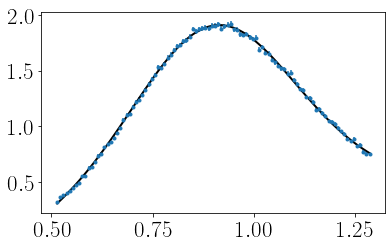

In [36]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [37]:
print(lb_opt, ub_opt)

0.32196872605314253 1.4785645933667315


In [38]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_eg<1.479)&(dvcsSimInbCDFT.MM2_eg>0.322)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_eg<1.479)&(bkgSimInbCDFT.MM2_eg>0.322)]

In [39]:
len(dvcsSimInbCDFT)

540259

In [40]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 29192.34042485391 94
0.0 411.82191433270737 94
0.9467347021786 72.99632171620566 94
[ 0.6358026   0.01363155  0.12457059  0.94776581  1.61815674 -6.69360332] -0.24220516179233262 0.2694682717069401 0.9467347021786
0.09510822563153509 112.38193131050136 94
0.0026982552805771 136.65028550445106 94
0.026200052417142183 122.38612663087137 94
0.015303840264383695 126.05084701076875 94
0.025494778995695078 122.57783080820603 94
0.055830182807415585 116.77332017413718 94
0.06260265279038268 115.86539489391069 94


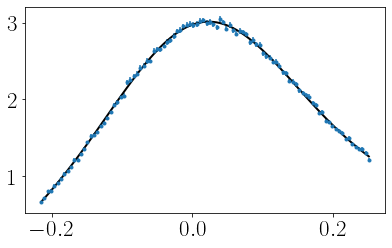

In [41]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [42]:
print(lb_opt, ub_opt)

-0.36008021977604926 0.3873433296906568


In [43]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.ME_epg<0.387)&(dvcsSimInbCDFT.ME_epg>-0.36)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.ME_epg<0.387)&(bkgSimInbCDFT.ME_epg>-0.36)]

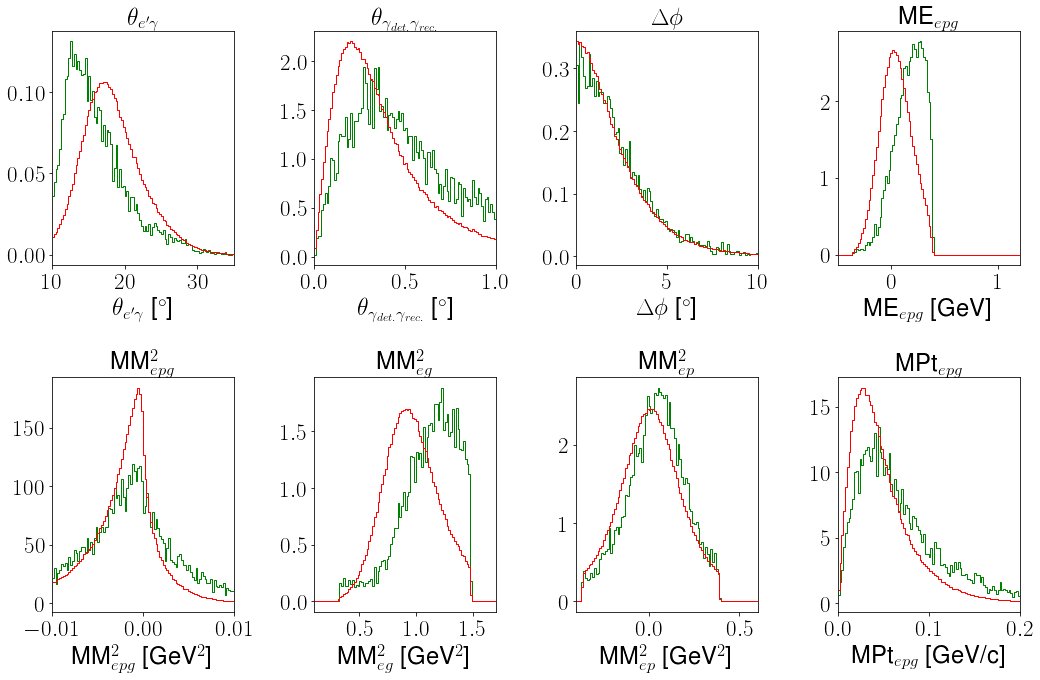

<Figure size 432x288 with 0 Axes>

In [44]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [45]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

2.309374913522788e-12 223.5102998300122 95
[ 4.48225050e-01  1.87764351e+00  1.60192961e-01 -3.18906721e-02
  1.63317781e-03] 0 9 2.309374913522788e-12
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95
2.509104035652854e-13 230.9528773591133 95


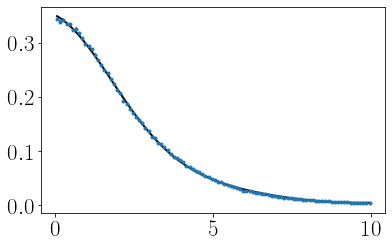

In [46]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [47]:
print(ub_opt)

5.632930515082304


In [48]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coplanarity<5.633)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coplanarity<5.633)]

In [49]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [50]:
GeEdges = np.linspace(3.5, 8.5, 11)
lbs = []
ubs = []
for j in range(len(GeEdges[:-1])):
    df1 = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Ge>GeEdges[j])&(dvcsSimInbCDFT.Ge<GeEdges[j+1])]
    df2 = bkgSimInbCDFT.loc[(bkgSimInbCDFT.Ge>GeEdges[j])&(bkgSimInbCDFT.Ge<GeEdges[j+1])]
    pvalue_opt = 0
    for i in range(0, 1):
        if i == 0:
            print(len(df1))
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = 21)
            bins = np.linspace(bins[np.argmax(simDist_dvcs)] -2.5, bins[np.argmax(simDist_dvcs)] + 4, 21)
            simDist_dvcs, _ = np.histogram(df1.coneAngle, bins = bins)
            simDist_dvpi0, _ = np.histogram(df2.coneAngle, bins = bins)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
            params = [1, bins[np.argmax(simDist)], 2.5, 0, 0, 0]
        else:
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = np.linspace(lb, ub, 101))
            simDist_dvpi0, bins = np.histogram(df2.coneAngle, bins = np.linspace(lb, ub, 101))
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
        params = res_lsq.x
        Amp, loc, scale, a, b, c = params
        lb = norm.ppf(0.02, loc = loc, scale = scale)
        ub = norm.ppf(0.98, loc = loc, scale = scale)
        pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
        print(pvalue, chi2fit, dof)
        if pvalue>pvalue_opt:
            pvalue_opt = pvalue
            bins_opt = bins
            bincenters_opt = bincenters
            params_opt = res_lsq.x
            lb_opt = loc - 3*scale
            ub_opt = loc + 3*scale
            lbs.append(lb_opt)
            ubs.append(ub_opt)
            dist_opt = simDist
            unc_opt = uncDist
            print(params_opt, lb, ub, pvalue)

2931
0.9870046709249777 4.911646417171146 14
[ 6.19264987e-01  1.19262326e+01  1.09641913e+00  3.30960591e-02
  1.85862685e-02 -1.32143667e-03] 9.674463043388378 14.178002241718985 0.9870046709249777
6545
0.13884368501710243 19.731281841574223 14
[ 9.18609058e-01  1.25293284e+01  1.34641148e+00  5.52521690e-01
 -7.89849035e-02  2.82652213e-03] 9.764137276132052 15.29451949657492 0.13884368501710243
11747
0.030038274513233487 25.488715645821255 14
[ 4.90376414e-01  1.30345280e+01  1.15768033e+00 -6.61200668e-01
  1.17021338e-01 -4.52840840e-03] 10.656943226969585 15.412112679882965 0.030038274513233487
19016
0.9451892078294174 6.713595829189221 14
[ 4.49774483e-01  1.36809770e+01  1.23268355e+00 -1.03686779e+00
  1.65927095e-01 -6.01873923e-03] 11.14935448162768 16.212599493880063 0.9451892078294174
29037
0.8646902343123766 8.44827682714423 14
[ 7.64672569e-01  1.43199536e+01  1.58461543e+00 -4.07819199e-01
  5.93826378e-02 -1.92399269e-03] 11.0655514362579 17.57435585601429 0.864690234

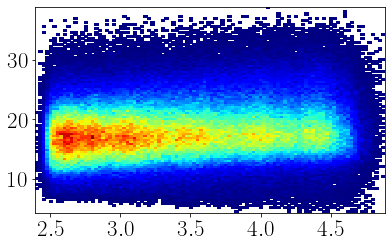

In [53]:
plt.hist2d(dvcsSimInbCDFT.Gtheta, dvcsSimInbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

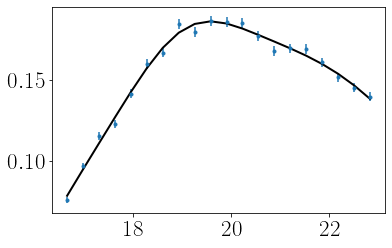

In [70]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [71]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[-0.1058125   2.93981217  5.52654352]
[ 0.43375082 -3.76582526 16.99359935]


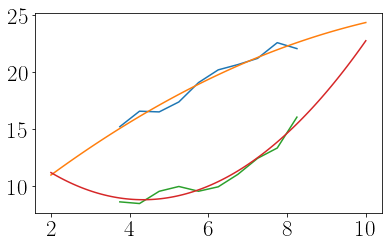

In [73]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.106, 2.940, 5.527])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.434, -3.766, 16.994])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [74]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle<np.poly1d([-0.106, 2.940, 5.527])(dvcsSimInbCDFT.Gp))&(dvcsSimInbCDFT.coneAngle>np.poly1d([0.434, -3.766, 16.994])(dvcsSimInbCDFT.Gp))]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coneAngle<np.poly1d([-0.106, 2.940, 5.527])(bkgSimInbCDFT.Gp))&(bkgSimInbCDFT.coneAngle>np.poly1d([0.434, -3.766, 16.994])(bkgSimInbCDFT.Gp))]

In [75]:
len(dvcsSimInbCDFT)

387661

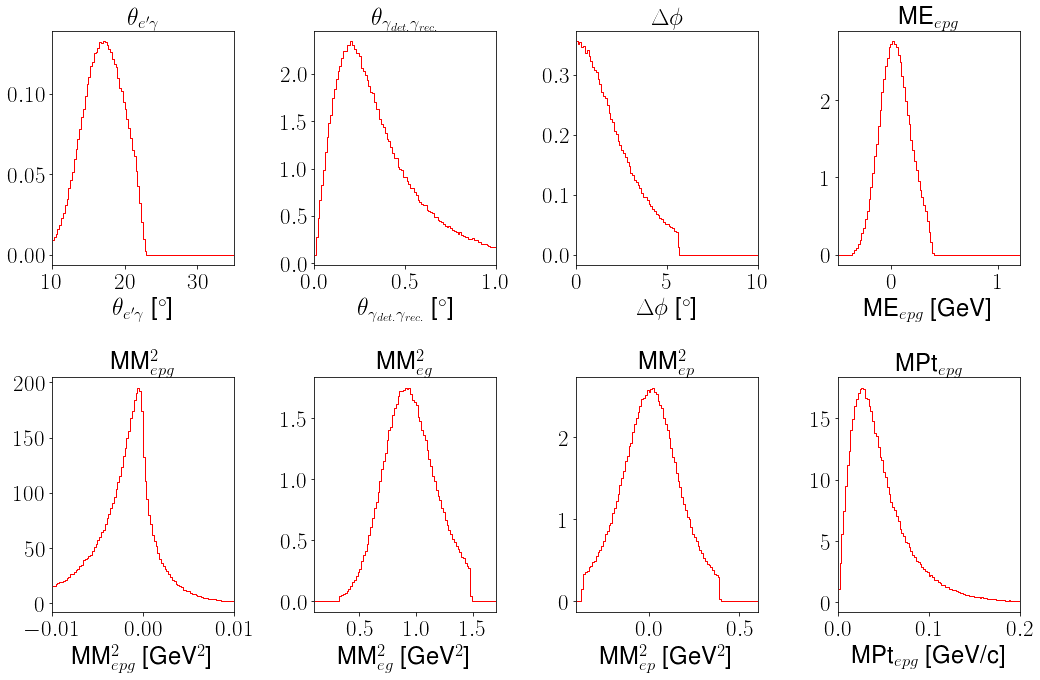

<Figure size 432x288 with 0 Axes>

In [76]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [77]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.18349260464055606 18.534907791312264 14
[ 2.19169338e+00  1.96463931e-02  2.15950661e-02 -2.61857371e+01
  5.61495574e+02  2.85677253e+02] 0.005 0.04 0.18349260464055606
0.1567080538468274 107.78430948248915 94
0.15670773652381287 107.78432934306262 94
0.1567065223692946 107.7844053346817 94
0.15670583523820214 107.78444834109557 94
0.1567062012082696 107.78442543560935 94
0.156704838677026 107.78451071447412 94
0.15670449577501244 107.78453217630032 94
0.15670457864020115 107.78452698986435 94
0.15670463138802448 107.78452368844034 94


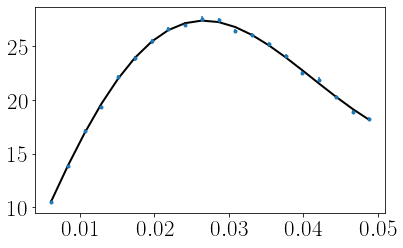

In [78]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [79]:
params_opt

array([ 2.19169338e+00,  1.96463931e-02,  2.15950661e-02, -2.61857371e+01,
        5.61495574e+02,  2.85677253e+02])

In [80]:
print(ub_opt)

0.08443159151882158


In [81]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MPt<0.0844)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MPt<0.0844)]

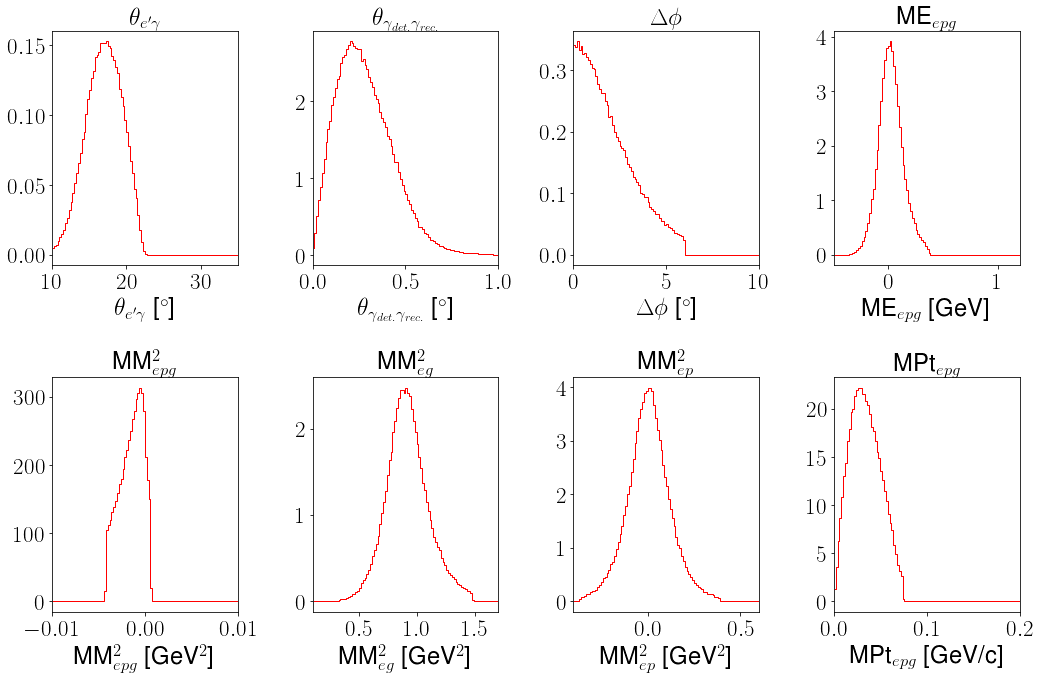

<Figure size 432x288 with 0 Axes>

In [161]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [165]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.6, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.6, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale
#         print(ub_opt, loc + 3*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.007304313663864748 130.76391886531667 94
[  1.25959876   0.16281744   0.16660424  -1.9089481   11.40779114
 -13.26756281] 0.005 0.6 0.007304313663864748


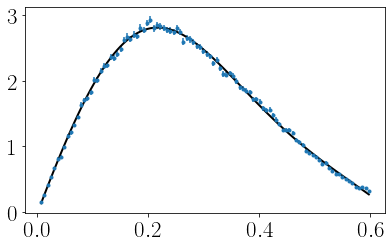

In [166]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [170]:
print(ub_opt)

0.6626301509477623


In [171]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.reconGam<0.582]
bkgSimInbCDFT = bkgSimInbCDFT.loc[bkgSimInbCDFT.reconGam<0.582]

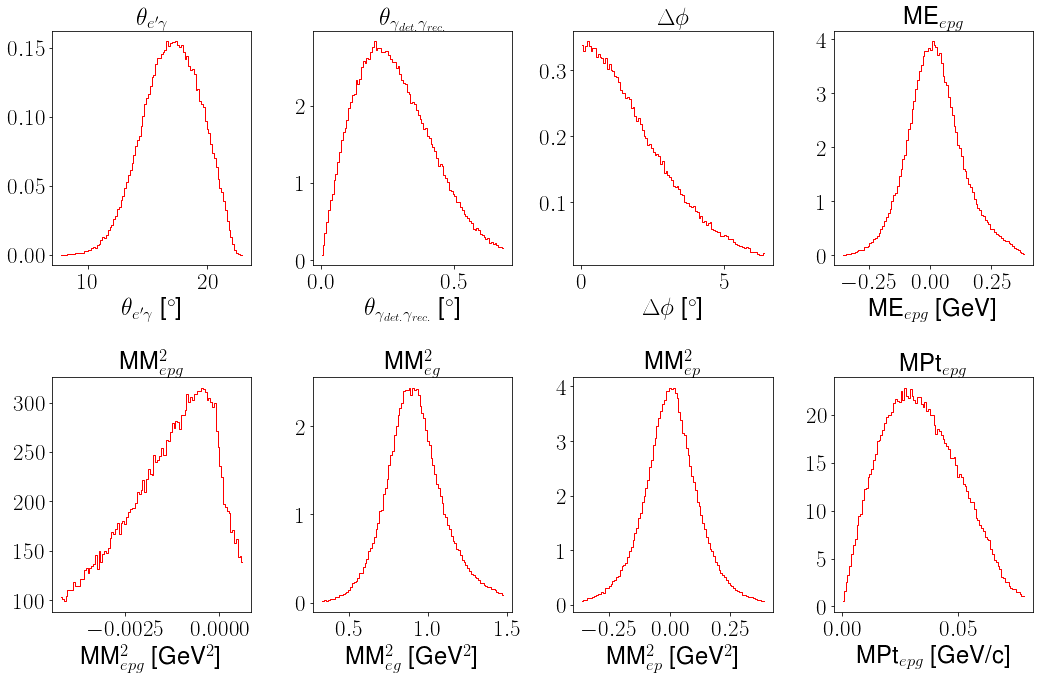

<Figure size 432x288 with 0 Axes>

In [76]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [490]:
len(dvcsSimInbCDFT)

258972

In [57]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_epg, bins = np.linspace(-0.01, 0.01, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_epg, bins = np.linspace(-0.01, 0.01, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.1, 0, 0.01, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  a, loc, scale, b, c, d  = params
#     lb = min(norm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = min(skewnorm.ppf(0.1, a=a, loc = loc, scale = scale), -0.01)
    ub = max(skewnorm.ppf(0.9, a=a, loc = loc, scale = scale), 0.01)
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = skewnorm.ppf(0.0013, a=a, loc = loc, scale = scale)
        ub_opt = skewnorm.ppf(1-0.0013, a=a, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 25246.75748371123 93
[ 5.41495308e-01 -3.93677102e+00  4.30422085e-04  2.71683637e-03
  3.10379070e+01 -1.49563464e+03 -2.43304586e+05] -0.01 0.01 0.0
0.0 25247.27045476916 93
0.0 25247.491181767902 93
0.0 25247.58544352651 93
0.0 25247.627555058243 93
0.0 25247.64499850534 93
0.0 25247.652152675 93
0.0 25247.656699506213 93
0.0 25247.656612047598 93
0.0 25247.657232625515 93


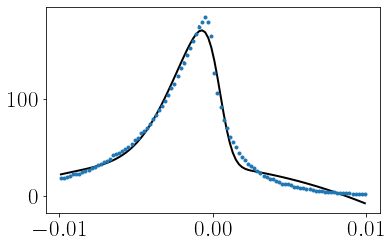

In [59]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [60]:
print(ub_opt, lb_opt)

0.0018355259270278284 -0.008306868689342405


In [133]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_epg<0.000629)&(dvcsSimInbCDFT.MM2_epg>-0.00423)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_epg<0.000629)&(bkgSimInbCDFT.MM2_epg>-0.00423)]

In [ ]:
print(dvcsSimInbCDFT.MM2_epg.mean()-3*dvcsSimInbCDFT.MM2_epg.std(), dvcsSimInbCDFT.MM2_epg.mean()+3*dvcsSimInbCDFT.MM2_epg.std())